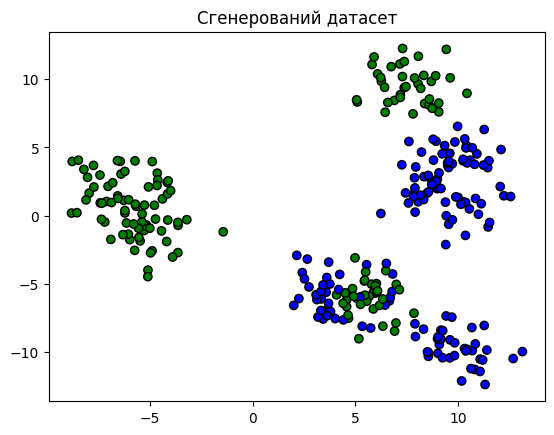

The best k = 17 , score = 0.9333333333333333


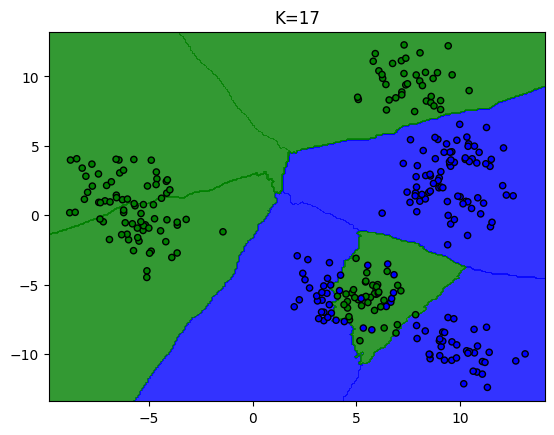

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

np.random.seed(2021)
X, y = make_blobs(n_samples=300, n_features=2, centers=8, cluster_std=1.3, random_state=4)
colors = ListedColormap(['blue', 'green'])


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors, edgecolor='k')
plt.title("Сгенерований датасет")
plt.show()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

accuracies = []

for k in range(1, 31):
 
    knn = KNeighborsClassifier(n_neighbors=k)
    
 
    knn.fit(X_train, y_train)
    
   
    y_pred = knn.predict(X_test)
    
    
    accuracies.append(accuracy_score(y_test, y_pred))

k_best = accuracies.index(max(accuracies)) + 1
score_best = max(accuracies)
print ('The best k = {} , score = {}'.format(k_best,score_best ))

knn_best = KNeighborsClassifier(n_neighbors=k_best)
knn_best.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=colors)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors, edgecolor='k', s=20)
plt.title(f"K={k_best}")
plt.show()
